# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

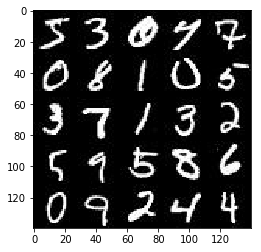

In [72]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

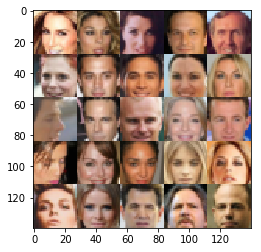

In [73]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [74]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [97]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = 'inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [98]:
def leaky_relu(x, alpha=0.2, name='leaky_relu'):
    tf.maximum(x, alpha * x, name=name)
    
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.01
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        #x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #relu1 = leaky_relu(x1, alpha=0.01)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #relu2 = leaky_relu(bn2, alpha=0.01)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #relu3 = leaky_relu(bn3, alpha=0.01)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
                
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [99]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.01
        h1 = tf.layers.dense(z, out_channel_dim, activation=None)
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #x1 = leaky_relu(x1, alpha=0.01)
        # 4x4x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # x2 = leaky_relu(x2, alpha = 0.01)
        # 7x7x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = leaky_relu(x3, alpha = 0.01)
        x3 = tf.maximum(alpha*x3, x3)
        # 14x14x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [100]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Generator network here
    g_model = generator(input_z, out_channel_dim, is_train=True)
    # g_model is the generator output

    # Disriminator network here
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate losses
    smooth = 0.1
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                        labels=tf.ones_like(d_logits_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                        labels=tf.zeros_like(d_logits_real)))
    
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [116]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)

    return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [117]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [118]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """ 
    #model_inputs(image_width, image_height, image_channels, z_dim):
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 0
            for batch_images in get_batches(batch_size):
                i += 1
                # TODO: Train Model
                batch_images = batch_images * 2.0
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                
                
                if i % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                if i % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} - Batch {}/{}: ".format(epoch_i+1, epoch_count, i, data_shape[0]//batch_size),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))    


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [119]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print(mnist_dataset.shape)


(60000, 28, 28, 1)


Epoch 1/2 - Batch 10/1875:  Discriminator Loss: 0.9825... Generator Loss: 4.0263
Epoch 1/2 - Batch 20/1875:  Discriminator Loss: 1.6937... Generator Loss: 14.7863
Epoch 1/2 - Batch 30/1875:  Discriminator Loss: 0.4579... Generator Loss: 4.4930
Epoch 1/2 - Batch 40/1875:  Discriminator Loss: 0.5253... Generator Loss: 9.2942
Epoch 1/2 - Batch 50/1875:  Discriminator Loss: 1.2138... Generator Loss: 12.3291
Epoch 1/2 - Batch 60/1875:  Discriminator Loss: 0.5119... Generator Loss: 2.3216
Epoch 1/2 - Batch 70/1875:  Discriminator Loss: 0.4628... Generator Loss: 2.6190
Epoch 1/2 - Batch 80/1875:  Discriminator Loss: 0.3993... Generator Loss: 3.2484
Epoch 1/2 - Batch 90/1875:  Discriminator Loss: 0.5520... Generator Loss: 6.6739


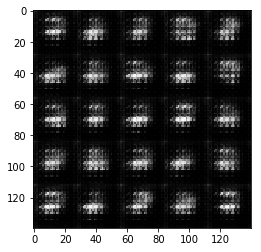

Epoch 1/2 - Batch 100/1875:  Discriminator Loss: 0.5741... Generator Loss: 2.6941
Epoch 1/2 - Batch 110/1875:  Discriminator Loss: 0.4283... Generator Loss: 2.9815
Epoch 1/2 - Batch 120/1875:  Discriminator Loss: 0.6464... Generator Loss: 2.5028
Epoch 1/2 - Batch 130/1875:  Discriminator Loss: 0.6400... Generator Loss: 2.0435
Epoch 1/2 - Batch 140/1875:  Discriminator Loss: 0.6520... Generator Loss: 1.9868
Epoch 1/2 - Batch 150/1875:  Discriminator Loss: 0.8899... Generator Loss: 1.7199
Epoch 1/2 - Batch 160/1875:  Discriminator Loss: 0.5073... Generator Loss: 2.8958
Epoch 1/2 - Batch 170/1875:  Discriminator Loss: 1.4185... Generator Loss: 0.8487
Epoch 1/2 - Batch 180/1875:  Discriminator Loss: 1.9419... Generator Loss: 0.4253
Epoch 1/2 - Batch 190/1875:  Discriminator Loss: 0.5916... Generator Loss: 2.4817


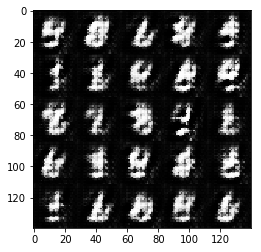

Epoch 1/2 - Batch 200/1875:  Discriminator Loss: 0.5480... Generator Loss: 2.8948
Epoch 1/2 - Batch 210/1875:  Discriminator Loss: 0.7373... Generator Loss: 1.5661
Epoch 1/2 - Batch 220/1875:  Discriminator Loss: 0.5203... Generator Loss: 2.6744
Epoch 1/2 - Batch 230/1875:  Discriminator Loss: 0.7942... Generator Loss: 1.6463
Epoch 1/2 - Batch 240/1875:  Discriminator Loss: 0.6795... Generator Loss: 3.4352
Epoch 1/2 - Batch 250/1875:  Discriminator Loss: 1.4145... Generator Loss: 4.8461
Epoch 1/2 - Batch 260/1875:  Discriminator Loss: 0.5837... Generator Loss: 2.0686
Epoch 1/2 - Batch 270/1875:  Discriminator Loss: 1.8837... Generator Loss: 5.5649
Epoch 1/2 - Batch 280/1875:  Discriminator Loss: 1.1533... Generator Loss: 0.9382
Epoch 1/2 - Batch 290/1875:  Discriminator Loss: 0.6388... Generator Loss: 2.1878


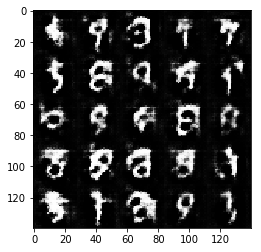

Epoch 1/2 - Batch 300/1875:  Discriminator Loss: 1.2387... Generator Loss: 0.7781
Epoch 1/2 - Batch 310/1875:  Discriminator Loss: 0.7013... Generator Loss: 1.7655
Epoch 1/2 - Batch 320/1875:  Discriminator Loss: 0.9229... Generator Loss: 1.2300
Epoch 1/2 - Batch 330/1875:  Discriminator Loss: 0.9504... Generator Loss: 1.0545
Epoch 1/2 - Batch 340/1875:  Discriminator Loss: 1.3130... Generator Loss: 0.6110
Epoch 1/2 - Batch 350/1875:  Discriminator Loss: 0.8413... Generator Loss: 1.5910
Epoch 1/2 - Batch 360/1875:  Discriminator Loss: 0.8041... Generator Loss: 1.5430
Epoch 1/2 - Batch 370/1875:  Discriminator Loss: 0.9139... Generator Loss: 1.1423
Epoch 1/2 - Batch 380/1875:  Discriminator Loss: 1.0960... Generator Loss: 0.9632
Epoch 1/2 - Batch 390/1875:  Discriminator Loss: 1.1136... Generator Loss: 0.7887


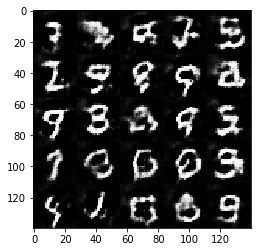

Epoch 1/2 - Batch 400/1875:  Discriminator Loss: 0.8822... Generator Loss: 1.5410
Epoch 1/2 - Batch 410/1875:  Discriminator Loss: 1.0728... Generator Loss: 0.9061
Epoch 1/2 - Batch 420/1875:  Discriminator Loss: 0.9599... Generator Loss: 1.1971
Epoch 1/2 - Batch 430/1875:  Discriminator Loss: 0.9108... Generator Loss: 1.6900
Epoch 1/2 - Batch 440/1875:  Discriminator Loss: 1.0431... Generator Loss: 0.8962
Epoch 1/2 - Batch 450/1875:  Discriminator Loss: 1.0839... Generator Loss: 0.8401
Epoch 1/2 - Batch 460/1875:  Discriminator Loss: 0.8148... Generator Loss: 1.4543
Epoch 1/2 - Batch 470/1875:  Discriminator Loss: 0.9286... Generator Loss: 1.0272
Epoch 1/2 - Batch 480/1875:  Discriminator Loss: 1.2772... Generator Loss: 2.2385
Epoch 1/2 - Batch 490/1875:  Discriminator Loss: 1.3957... Generator Loss: 0.5616


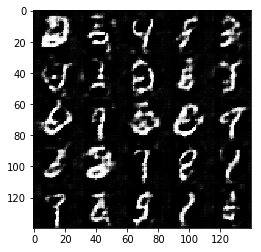

Epoch 1/2 - Batch 500/1875:  Discriminator Loss: 1.3378... Generator Loss: 0.5887
Epoch 1/2 - Batch 510/1875:  Discriminator Loss: 1.7339... Generator Loss: 0.3981
Epoch 1/2 - Batch 520/1875:  Discriminator Loss: 0.9600... Generator Loss: 1.3339
Epoch 1/2 - Batch 530/1875:  Discriminator Loss: 1.0097... Generator Loss: 1.3629
Epoch 1/2 - Batch 540/1875:  Discriminator Loss: 1.0209... Generator Loss: 1.0146
Epoch 1/2 - Batch 550/1875:  Discriminator Loss: 0.8699... Generator Loss: 1.6078
Epoch 1/2 - Batch 560/1875:  Discriminator Loss: 1.1171... Generator Loss: 2.4116
Epoch 1/2 - Batch 570/1875:  Discriminator Loss: 1.0163... Generator Loss: 1.0753
Epoch 1/2 - Batch 580/1875:  Discriminator Loss: 1.1348... Generator Loss: 0.8104


KeyboardInterrupt: 

In [120]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 - Batch 10/6331:  Discriminator Loss: 0.6663... Generator Loss: 3.4506
Epoch 1/1 - Batch 20/6331:  Discriminator Loss: 0.6390... Generator Loss: 2.1246
Epoch 1/1 - Batch 30/6331:  Discriminator Loss: 0.4327... Generator Loss: 4.1185
Epoch 1/1 - Batch 40/6331:  Discriminator Loss: 0.3975... Generator Loss: 4.8922
Epoch 1/1 - Batch 50/6331:  Discriminator Loss: 0.3747... Generator Loss: 4.3098
Epoch 1/1 - Batch 60/6331:  Discriminator Loss: 0.3866... Generator Loss: 4.1509
Epoch 1/1 - Batch 70/6331:  Discriminator Loss: 0.3956... Generator Loss: 4.4593
Epoch 1/1 - Batch 80/6331:  Discriminator Loss: 0.3768... Generator Loss: 3.6979
Epoch 1/1 - Batch 90/6331:  Discriminator Loss: 0.3706... Generator Loss: 4.0545


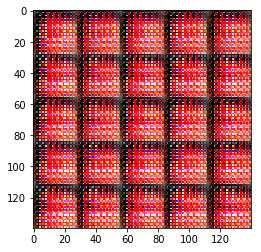

Epoch 1/1 - Batch 100/6331:  Discriminator Loss: 0.3557... Generator Loss: 4.8146
Epoch 1/1 - Batch 110/6331:  Discriminator Loss: 0.3506... Generator Loss: 5.4529
Epoch 1/1 - Batch 120/6331:  Discriminator Loss: 0.3913... Generator Loss: 3.8580
Epoch 1/1 - Batch 130/6331:  Discriminator Loss: 0.3721... Generator Loss: 5.2187
Epoch 1/1 - Batch 140/6331:  Discriminator Loss: 0.3433... Generator Loss: 7.1998
Epoch 1/1 - Batch 150/6331:  Discriminator Loss: 0.3449... Generator Loss: 6.1312
Epoch 1/1 - Batch 160/6331:  Discriminator Loss: 0.3358... Generator Loss: 6.0083
Epoch 1/1 - Batch 170/6331:  Discriminator Loss: 0.3414... Generator Loss: 6.6041
Epoch 1/1 - Batch 180/6331:  Discriminator Loss: 0.3426... Generator Loss: 5.4306
Epoch 1/1 - Batch 190/6331:  Discriminator Loss: 0.3775... Generator Loss: 3.8885


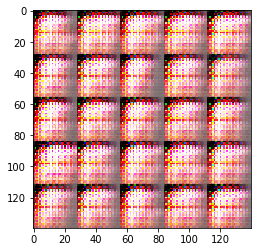

Epoch 1/1 - Batch 200/6331:  Discriminator Loss: 0.3560... Generator Loss: 4.7774
Epoch 1/1 - Batch 210/6331:  Discriminator Loss: 0.3746... Generator Loss: 6.5551
Epoch 1/1 - Batch 220/6331:  Discriminator Loss: 0.3966... Generator Loss: 5.7194
Epoch 1/1 - Batch 230/6331:  Discriminator Loss: 0.3690... Generator Loss: 5.6284
Epoch 1/1 - Batch 240/6331:  Discriminator Loss: 0.3635... Generator Loss: 4.9269
Epoch 1/1 - Batch 250/6331:  Discriminator Loss: 0.3596... Generator Loss: 5.3867
Epoch 1/1 - Batch 260/6331:  Discriminator Loss: 0.3434... Generator Loss: 5.8065
Epoch 1/1 - Batch 270/6331:  Discriminator Loss: 0.3483... Generator Loss: 5.8300
Epoch 1/1 - Batch 280/6331:  Discriminator Loss: 0.3514... Generator Loss: 5.0109
Epoch 1/1 - Batch 290/6331:  Discriminator Loss: 0.3548... Generator Loss: 5.5389


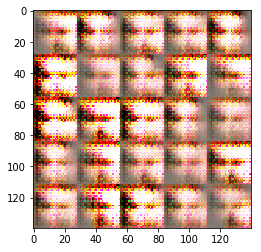

Epoch 1/1 - Batch 300/6331:  Discriminator Loss: 0.3741... Generator Loss: 4.7993
Epoch 1/1 - Batch 310/6331:  Discriminator Loss: 0.3689... Generator Loss: 6.0811
Epoch 1/1 - Batch 320/6331:  Discriminator Loss: 0.3548... Generator Loss: 5.7874
Epoch 1/1 - Batch 330/6331:  Discriminator Loss: 0.3747... Generator Loss: 4.4938
Epoch 1/1 - Batch 340/6331:  Discriminator Loss: 0.3518... Generator Loss: 4.8233
Epoch 1/1 - Batch 350/6331:  Discriminator Loss: 0.3580... Generator Loss: 5.1680
Epoch 1/1 - Batch 360/6331:  Discriminator Loss: 0.3518... Generator Loss: 6.3228
Epoch 1/1 - Batch 370/6331:  Discriminator Loss: 0.3929... Generator Loss: 4.0578
Epoch 1/1 - Batch 380/6331:  Discriminator Loss: 0.4287... Generator Loss: 8.7808
Epoch 1/1 - Batch 390/6331:  Discriminator Loss: 0.4596... Generator Loss: 2.5080


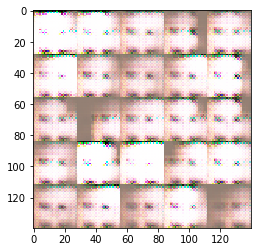

Epoch 1/1 - Batch 400/6331:  Discriminator Loss: 0.3662... Generator Loss: 6.1587
Epoch 1/1 - Batch 410/6331:  Discriminator Loss: 0.3726... Generator Loss: 3.9203
Epoch 1/1 - Batch 420/6331:  Discriminator Loss: 0.4459... Generator Loss: 3.8564
Epoch 1/1 - Batch 430/6331:  Discriminator Loss: 0.3820... Generator Loss: 3.8287
Epoch 1/1 - Batch 440/6331:  Discriminator Loss: 0.4035... Generator Loss: 6.0124
Epoch 1/1 - Batch 450/6331:  Discriminator Loss: 0.5318... Generator Loss: 2.4766
Epoch 1/1 - Batch 460/6331:  Discriminator Loss: 0.3853... Generator Loss: 4.4690
Epoch 1/1 - Batch 470/6331:  Discriminator Loss: 0.3560... Generator Loss: 5.1357
Epoch 1/1 - Batch 480/6331:  Discriminator Loss: 0.3557... Generator Loss: 5.3893
Epoch 1/1 - Batch 490/6331:  Discriminator Loss: 0.3471... Generator Loss: 4.4903


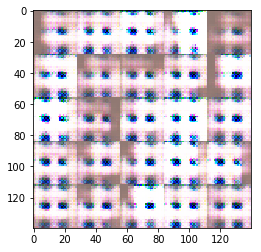

Epoch 1/1 - Batch 500/6331:  Discriminator Loss: 0.3454... Generator Loss: 5.4468
Epoch 1/1 - Batch 510/6331:  Discriminator Loss: 0.3504... Generator Loss: 4.8771
Epoch 1/1 - Batch 520/6331:  Discriminator Loss: 0.3947... Generator Loss: 5.2538
Epoch 1/1 - Batch 530/6331:  Discriminator Loss: 0.3834... Generator Loss: 4.6772
Epoch 1/1 - Batch 540/6331:  Discriminator Loss: 0.3649... Generator Loss: 5.3686
Epoch 1/1 - Batch 550/6331:  Discriminator Loss: 0.4320... Generator Loss: 5.9392
Epoch 1/1 - Batch 560/6331:  Discriminator Loss: 0.3823... Generator Loss: 6.8567
Epoch 1/1 - Batch 570/6331:  Discriminator Loss: 0.5843... Generator Loss: 2.1371
Epoch 1/1 - Batch 580/6331:  Discriminator Loss: 0.4374... Generator Loss: 2.7327
Epoch 1/1 - Batch 590/6331:  Discriminator Loss: 0.4025... Generator Loss: 4.2888


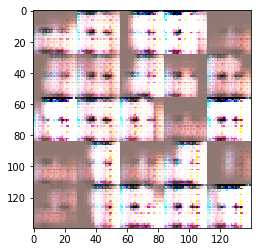

Epoch 1/1 - Batch 600/6331:  Discriminator Loss: 0.3701... Generator Loss: 6.0531
Epoch 1/1 - Batch 610/6331:  Discriminator Loss: 0.3952... Generator Loss: 4.2151
Epoch 1/1 - Batch 620/6331:  Discriminator Loss: 0.4161... Generator Loss: 3.4748
Epoch 1/1 - Batch 630/6331:  Discriminator Loss: 0.4134... Generator Loss: 3.5501
Epoch 1/1 - Batch 640/6331:  Discriminator Loss: 0.4133... Generator Loss: 8.2440
Epoch 1/1 - Batch 650/6331:  Discriminator Loss: 0.3732... Generator Loss: 7.1086
Epoch 1/1 - Batch 660/6331:  Discriminator Loss: 0.3500... Generator Loss: 8.1333
Epoch 1/1 - Batch 670/6331:  Discriminator Loss: 0.3752... Generator Loss: 3.8208
Epoch 1/1 - Batch 680/6331:  Discriminator Loss: 0.3887... Generator Loss: 4.3712
Epoch 1/1 - Batch 690/6331:  Discriminator Loss: 0.3758... Generator Loss: 4.4803


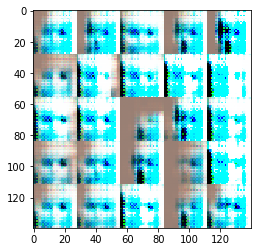

Epoch 1/1 - Batch 700/6331:  Discriminator Loss: 0.3913... Generator Loss: 3.4870
Epoch 1/1 - Batch 710/6331:  Discriminator Loss: 0.3510... Generator Loss: 4.9394
Epoch 1/1 - Batch 720/6331:  Discriminator Loss: 0.3840... Generator Loss: 3.4111
Epoch 1/1 - Batch 730/6331:  Discriminator Loss: 0.4071... Generator Loss: 3.5236
Epoch 1/1 - Batch 740/6331:  Discriminator Loss: 0.5081... Generator Loss: 9.0130
Epoch 1/1 - Batch 750/6331:  Discriminator Loss: 0.4162... Generator Loss: 3.3008
Epoch 1/1 - Batch 760/6331:  Discriminator Loss: 0.4321... Generator Loss: 3.1979
Epoch 1/1 - Batch 770/6331:  Discriminator Loss: 0.3433... Generator Loss: 5.6529
Epoch 1/1 - Batch 780/6331:  Discriminator Loss: 0.3874... Generator Loss: 4.7098
Epoch 1/1 - Batch 790/6331:  Discriminator Loss: 0.4383... Generator Loss: 3.8501


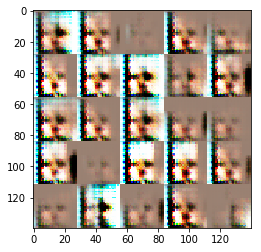

Epoch 1/1 - Batch 800/6331:  Discriminator Loss: 0.3557... Generator Loss: 4.4193
Epoch 1/1 - Batch 810/6331:  Discriminator Loss: 0.3884... Generator Loss: 3.9910
Epoch 1/1 - Batch 820/6331:  Discriminator Loss: 0.3704... Generator Loss: 6.3266
Epoch 1/1 - Batch 830/6331:  Discriminator Loss: 0.3773... Generator Loss: 3.8489
Epoch 1/1 - Batch 840/6331:  Discriminator Loss: 0.4165... Generator Loss: 3.9507
Epoch 1/1 - Batch 850/6331:  Discriminator Loss: 0.3760... Generator Loss: 4.6723
Epoch 1/1 - Batch 860/6331:  Discriminator Loss: 0.4163... Generator Loss: 7.2649
Epoch 1/1 - Batch 870/6331:  Discriminator Loss: 0.4092... Generator Loss: 4.9814
Epoch 1/1 - Batch 880/6331:  Discriminator Loss: 0.6993... Generator Loss: 1.6544
Epoch 1/1 - Batch 890/6331:  Discriminator Loss: 0.4459... Generator Loss: 3.9525


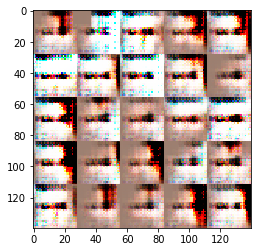

Epoch 1/1 - Batch 900/6331:  Discriminator Loss: 0.5839... Generator Loss: 1.7429
Epoch 1/1 - Batch 910/6331:  Discriminator Loss: 0.6591... Generator Loss: 3.4558
Epoch 1/1 - Batch 920/6331:  Discriminator Loss: 0.5636... Generator Loss: 3.1139
Epoch 1/1 - Batch 930/6331:  Discriminator Loss: 0.3695... Generator Loss: 6.2042
Epoch 1/1 - Batch 940/6331:  Discriminator Loss: 0.3771... Generator Loss: 4.0906
Epoch 1/1 - Batch 950/6331:  Discriminator Loss: 0.4658... Generator Loss: 3.0844
Epoch 1/1 - Batch 960/6331:  Discriminator Loss: 0.4480... Generator Loss: 3.3654
Epoch 1/1 - Batch 970/6331:  Discriminator Loss: 0.4396... Generator Loss: 3.2555
Epoch 1/1 - Batch 980/6331:  Discriminator Loss: 0.5087... Generator Loss: 3.1592
Epoch 1/1 - Batch 990/6331:  Discriminator Loss: 0.4052... Generator Loss: 6.0556


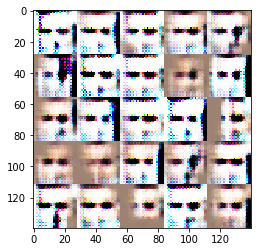

Epoch 1/1 - Batch 1000/6331:  Discriminator Loss: 0.4062... Generator Loss: 4.5955
Epoch 1/1 - Batch 1010/6331:  Discriminator Loss: 0.4629... Generator Loss: 4.8631
Epoch 1/1 - Batch 1020/6331:  Discriminator Loss: 0.5262... Generator Loss: 2.9885
Epoch 1/1 - Batch 1030/6331:  Discriminator Loss: 0.4359... Generator Loss: 3.9612
Epoch 1/1 - Batch 1040/6331:  Discriminator Loss: 0.3977... Generator Loss: 4.9598
Epoch 1/1 - Batch 1050/6331:  Discriminator Loss: 0.4268... Generator Loss: 4.1275
Epoch 1/1 - Batch 1060/6331:  Discriminator Loss: 0.3668... Generator Loss: 6.2420
Epoch 1/1 - Batch 1070/6331:  Discriminator Loss: 0.3559... Generator Loss: 5.1523
Epoch 1/1 - Batch 1080/6331:  Discriminator Loss: 0.4305... Generator Loss: 3.2244
Epoch 1/1 - Batch 1090/6331:  Discriminator Loss: 0.4046... Generator Loss: 3.7019


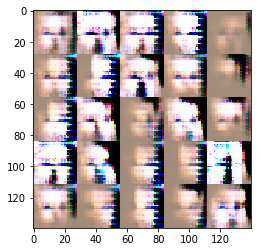

Epoch 1/1 - Batch 1100/6331:  Discriminator Loss: 0.4252... Generator Loss: 4.4942
Epoch 1/1 - Batch 1110/6331:  Discriminator Loss: 0.4264... Generator Loss: 2.9425
Epoch 1/1 - Batch 1120/6331:  Discriminator Loss: 0.4188... Generator Loss: 5.5498
Epoch 1/1 - Batch 1130/6331:  Discriminator Loss: 0.3870... Generator Loss: 4.8366
Epoch 1/1 - Batch 1140/6331:  Discriminator Loss: 0.6146... Generator Loss: 2.6452
Epoch 1/1 - Batch 1150/6331:  Discriminator Loss: 0.3971... Generator Loss: 6.7500
Epoch 1/1 - Batch 1160/6331:  Discriminator Loss: 0.5424... Generator Loss: 6.0466
Epoch 1/1 - Batch 1170/6331:  Discriminator Loss: 0.4069... Generator Loss: 6.0714
Epoch 1/1 - Batch 1180/6331:  Discriminator Loss: 0.4169... Generator Loss: 4.6311
Epoch 1/1 - Batch 1190/6331:  Discriminator Loss: 0.3989... Generator Loss: 4.0340


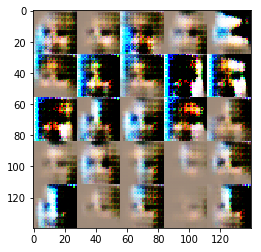

Epoch 1/1 - Batch 1200/6331:  Discriminator Loss: 0.4092... Generator Loss: 3.7584
Epoch 1/1 - Batch 1210/6331:  Discriminator Loss: 0.3952... Generator Loss: 4.0713
Epoch 1/1 - Batch 1220/6331:  Discriminator Loss: 0.4125... Generator Loss: 3.6078
Epoch 1/1 - Batch 1230/6331:  Discriminator Loss: 0.4000... Generator Loss: 3.8906
Epoch 1/1 - Batch 1240/6331:  Discriminator Loss: 0.3856... Generator Loss: 3.8911
Epoch 1/1 - Batch 1250/6331:  Discriminator Loss: 0.4013... Generator Loss: 3.6948
Epoch 1/1 - Batch 1260/6331:  Discriminator Loss: 0.3855... Generator Loss: 3.6277
Epoch 1/1 - Batch 1270/6331:  Discriminator Loss: 0.3982... Generator Loss: 6.1611
Epoch 1/1 - Batch 1280/6331:  Discriminator Loss: 0.4778... Generator Loss: 2.8987
Epoch 1/1 - Batch 1290/6331:  Discriminator Loss: 0.3612... Generator Loss: 4.8356


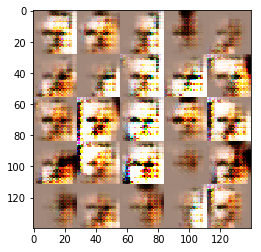

Epoch 1/1 - Batch 1300/6331:  Discriminator Loss: 0.4681... Generator Loss: 2.3502
Epoch 1/1 - Batch 1310/6331:  Discriminator Loss: 0.4564... Generator Loss: 5.0134
Epoch 1/1 - Batch 1320/6331:  Discriminator Loss: 0.4231... Generator Loss: 3.9629
Epoch 1/1 - Batch 1330/6331:  Discriminator Loss: 0.3908... Generator Loss: 4.3035
Epoch 1/1 - Batch 1340/6331:  Discriminator Loss: 0.5387... Generator Loss: 2.7319
Epoch 1/1 - Batch 1350/6331:  Discriminator Loss: 0.4329... Generator Loss: 4.5007
Epoch 1/1 - Batch 1360/6331:  Discriminator Loss: 0.4072... Generator Loss: 4.6522
Epoch 1/1 - Batch 1370/6331:  Discriminator Loss: 0.6038... Generator Loss: 1.7797
Epoch 1/1 - Batch 1380/6331:  Discriminator Loss: 0.3994... Generator Loss: 4.7787
Epoch 1/1 - Batch 1390/6331:  Discriminator Loss: 0.4365... Generator Loss: 3.4832


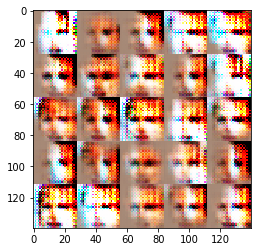

Epoch 1/1 - Batch 1400/6331:  Discriminator Loss: 0.4014... Generator Loss: 5.3656
Epoch 1/1 - Batch 1410/6331:  Discriminator Loss: 0.4101... Generator Loss: 3.5275
Epoch 1/1 - Batch 1420/6331:  Discriminator Loss: 0.5512... Generator Loss: 2.4626
Epoch 1/1 - Batch 1430/6331:  Discriminator Loss: 0.3756... Generator Loss: 6.9522
Epoch 1/1 - Batch 1440/6331:  Discriminator Loss: 0.4072... Generator Loss: 3.9195
Epoch 1/1 - Batch 1450/6331:  Discriminator Loss: 0.4364... Generator Loss: 2.9626
Epoch 1/1 - Batch 1460/6331:  Discriminator Loss: 0.4386... Generator Loss: 3.8648
Epoch 1/1 - Batch 1470/6331:  Discriminator Loss: 0.4652... Generator Loss: 2.6102
Epoch 1/1 - Batch 1480/6331:  Discriminator Loss: 0.3902... Generator Loss: 6.2468
Epoch 1/1 - Batch 1490/6331:  Discriminator Loss: 0.3688... Generator Loss: 6.2500


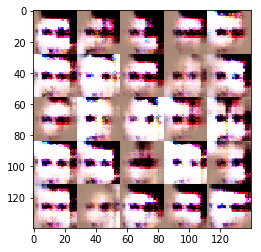

Epoch 1/1 - Batch 1500/6331:  Discriminator Loss: 0.4367... Generator Loss: 3.5469
Epoch 1/1 - Batch 1510/6331:  Discriminator Loss: 0.4248... Generator Loss: 3.3513
Epoch 1/1 - Batch 1520/6331:  Discriminator Loss: 0.3995... Generator Loss: 4.6102
Epoch 1/1 - Batch 1530/6331:  Discriminator Loss: 0.4229... Generator Loss: 3.5519
Epoch 1/1 - Batch 1540/6331:  Discriminator Loss: 0.3816... Generator Loss: 4.4085
Epoch 1/1 - Batch 1550/6331:  Discriminator Loss: 0.3994... Generator Loss: 3.2493
Epoch 1/1 - Batch 1560/6331:  Discriminator Loss: 0.3864... Generator Loss: 6.3124
Epoch 1/1 - Batch 1570/6331:  Discriminator Loss: 0.4392... Generator Loss: 6.7787
Epoch 1/1 - Batch 1580/6331:  Discriminator Loss: 0.4206... Generator Loss: 5.5728
Epoch 1/1 - Batch 1590/6331:  Discriminator Loss: 0.3836... Generator Loss: 4.6402


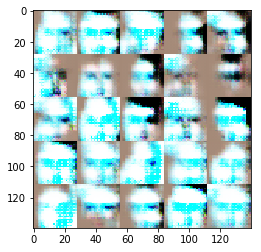

Epoch 1/1 - Batch 1600/6331:  Discriminator Loss: 0.4357... Generator Loss: 2.8794
Epoch 1/1 - Batch 1610/6331:  Discriminator Loss: 0.3922... Generator Loss: 4.3168
Epoch 1/1 - Batch 1620/6331:  Discriminator Loss: 0.5843... Generator Loss: 2.0045
Epoch 1/1 - Batch 1630/6331:  Discriminator Loss: 0.4173... Generator Loss: 4.1380
Epoch 1/1 - Batch 1640/6331:  Discriminator Loss: 0.5766... Generator Loss: 3.3159
Epoch 1/1 - Batch 1650/6331:  Discriminator Loss: 0.4736... Generator Loss: 3.3936
Epoch 1/1 - Batch 1660/6331:  Discriminator Loss: 0.4548... Generator Loss: 4.1828
Epoch 1/1 - Batch 1670/6331:  Discriminator Loss: 0.4880... Generator Loss: 4.2149
Epoch 1/1 - Batch 1680/6331:  Discriminator Loss: 0.4440... Generator Loss: 3.5830
Epoch 1/1 - Batch 1690/6331:  Discriminator Loss: 0.4664... Generator Loss: 4.3318


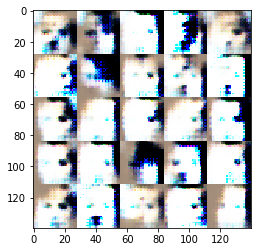

Epoch 1/1 - Batch 1700/6331:  Discriminator Loss: 0.5554... Generator Loss: 6.7935
Epoch 1/1 - Batch 1710/6331:  Discriminator Loss: 0.4552... Generator Loss: 7.2469
Epoch 1/1 - Batch 1720/6331:  Discriminator Loss: 0.5533... Generator Loss: 6.4815
Epoch 1/1 - Batch 1730/6331:  Discriminator Loss: 0.5346... Generator Loss: 2.7154
Epoch 1/1 - Batch 1740/6331:  Discriminator Loss: 0.6942... Generator Loss: 5.4648
Epoch 1/1 - Batch 1750/6331:  Discriminator Loss: 0.6391... Generator Loss: 2.4413
Epoch 1/1 - Batch 1760/6331:  Discriminator Loss: 0.5381... Generator Loss: 2.4027
Epoch 1/1 - Batch 1770/6331:  Discriminator Loss: 0.4798... Generator Loss: 3.2357
Epoch 1/1 - Batch 1780/6331:  Discriminator Loss: 0.5932... Generator Loss: 2.2887
Epoch 1/1 - Batch 1790/6331:  Discriminator Loss: 0.4840... Generator Loss: 5.9768


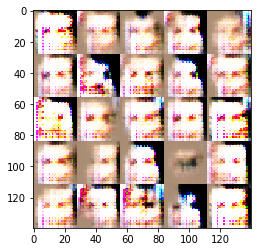

Epoch 1/1 - Batch 1800/6331:  Discriminator Loss: 0.4641... Generator Loss: 3.0951
Epoch 1/1 - Batch 1810/6331:  Discriminator Loss: 0.4192... Generator Loss: 4.3370
Epoch 1/1 - Batch 1820/6331:  Discriminator Loss: 0.4370... Generator Loss: 4.3777
Epoch 1/1 - Batch 1830/6331:  Discriminator Loss: 0.4139... Generator Loss: 3.5338
Epoch 1/1 - Batch 1840/6331:  Discriminator Loss: 0.3900... Generator Loss: 4.4826
Epoch 1/1 - Batch 1850/6331:  Discriminator Loss: 0.4249... Generator Loss: 3.2009
Epoch 1/1 - Batch 1860/6331:  Discriminator Loss: 0.4500... Generator Loss: 3.0861
Epoch 1/1 - Batch 1870/6331:  Discriminator Loss: 0.4075... Generator Loss: 3.9852
Epoch 1/1 - Batch 1880/6331:  Discriminator Loss: 0.5354... Generator Loss: 2.7997
Epoch 1/1 - Batch 1890/6331:  Discriminator Loss: 0.4827... Generator Loss: 3.2528


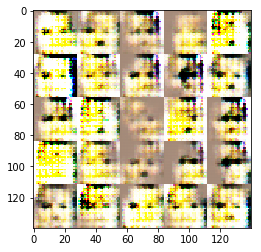

Epoch 1/1 - Batch 1900/6331:  Discriminator Loss: 0.4034... Generator Loss: 4.4247
Epoch 1/1 - Batch 1910/6331:  Discriminator Loss: 0.3990... Generator Loss: 4.3705
Epoch 1/1 - Batch 1920/6331:  Discriminator Loss: 0.3765... Generator Loss: 6.4450
Epoch 1/1 - Batch 1930/6331:  Discriminator Loss: 0.4311... Generator Loss: 4.1621
Epoch 1/1 - Batch 1940/6331:  Discriminator Loss: 0.4990... Generator Loss: 2.8491
Epoch 1/1 - Batch 1950/6331:  Discriminator Loss: 0.4799... Generator Loss: 3.3092
Epoch 1/1 - Batch 1960/6331:  Discriminator Loss: 0.5568... Generator Loss: 2.8204
Epoch 1/1 - Batch 1970/6331:  Discriminator Loss: 0.4057... Generator Loss: 4.8538
Epoch 1/1 - Batch 1980/6331:  Discriminator Loss: 0.5051... Generator Loss: 2.8235
Epoch 1/1 - Batch 1990/6331:  Discriminator Loss: 0.4850... Generator Loss: 6.4836


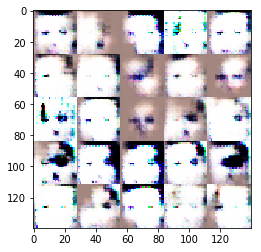

Epoch 1/1 - Batch 2000/6331:  Discriminator Loss: 0.5421... Generator Loss: 2.8868
Epoch 1/1 - Batch 2010/6331:  Discriminator Loss: 0.7963... Generator Loss: 2.3869
Epoch 1/1 - Batch 2020/6331:  Discriminator Loss: 0.8044... Generator Loss: 1.6539
Epoch 1/1 - Batch 2030/6331:  Discriminator Loss: 0.4977... Generator Loss: 2.5615
Epoch 1/1 - Batch 2040/6331:  Discriminator Loss: 0.4961... Generator Loss: 2.8518
Epoch 1/1 - Batch 2050/6331:  Discriminator Loss: 0.6714... Generator Loss: 2.6371
Epoch 1/1 - Batch 2060/6331:  Discriminator Loss: 0.5605... Generator Loss: 3.5048
Epoch 1/1 - Batch 2070/6331:  Discriminator Loss: 0.5169... Generator Loss: 3.0818
Epoch 1/1 - Batch 2080/6331:  Discriminator Loss: 0.4732... Generator Loss: 2.9746
Epoch 1/1 - Batch 2090/6331:  Discriminator Loss: 0.5888... Generator Loss: 3.1457


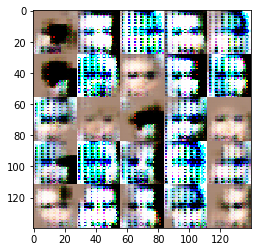

Epoch 1/1 - Batch 2100/6331:  Discriminator Loss: 0.4558... Generator Loss: 4.3728
Epoch 1/1 - Batch 2110/6331:  Discriminator Loss: 0.4540... Generator Loss: 3.8727
Epoch 1/1 - Batch 2120/6331:  Discriminator Loss: 0.4101... Generator Loss: 3.8892
Epoch 1/1 - Batch 2130/6331:  Discriminator Loss: 0.3715... Generator Loss: 4.3517
Epoch 1/1 - Batch 2140/6331:  Discriminator Loss: 0.4163... Generator Loss: 3.8896
Epoch 1/1 - Batch 2150/6331:  Discriminator Loss: 0.4601... Generator Loss: 3.5094
Epoch 1/1 - Batch 2160/6331:  Discriminator Loss: 0.4734... Generator Loss: 6.0850
Epoch 1/1 - Batch 2170/6331:  Discriminator Loss: 0.6290... Generator Loss: 3.4067
Epoch 1/1 - Batch 2180/6331:  Discriminator Loss: 0.5736... Generator Loss: 2.4058
Epoch 1/1 - Batch 2190/6331:  Discriminator Loss: 0.4540... Generator Loss: 3.3246


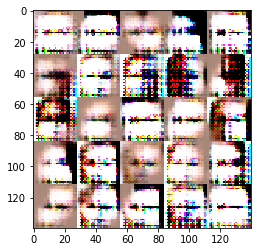

Epoch 1/1 - Batch 2200/6331:  Discriminator Loss: 0.3968... Generator Loss: 5.4498
Epoch 1/1 - Batch 2210/6331:  Discriminator Loss: 0.3962... Generator Loss: 4.5895
Epoch 1/1 - Batch 2220/6331:  Discriminator Loss: 0.4417... Generator Loss: 3.7359
Epoch 1/1 - Batch 2230/6331:  Discriminator Loss: 0.3991... Generator Loss: 3.5158
Epoch 1/1 - Batch 2240/6331:  Discriminator Loss: 0.4876... Generator Loss: 2.6615
Epoch 1/1 - Batch 2250/6331:  Discriminator Loss: 0.5377... Generator Loss: 2.7511
Epoch 1/1 - Batch 2260/6331:  Discriminator Loss: 0.4566... Generator Loss: 3.8114
Epoch 1/1 - Batch 2270/6331:  Discriminator Loss: 0.5862... Generator Loss: 2.4018
Epoch 1/1 - Batch 2280/6331:  Discriminator Loss: 0.4514... Generator Loss: 4.7961
Epoch 1/1 - Batch 2290/6331:  Discriminator Loss: 0.4906... Generator Loss: 3.9356


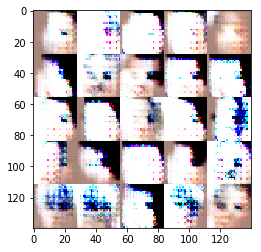

Epoch 1/1 - Batch 2300/6331:  Discriminator Loss: 0.3897... Generator Loss: 4.0906
Epoch 1/1 - Batch 2310/6331:  Discriminator Loss: 0.3635... Generator Loss: 4.7644
Epoch 1/1 - Batch 2320/6331:  Discriminator Loss: 0.3722... Generator Loss: 5.2673
Epoch 1/1 - Batch 2330/6331:  Discriminator Loss: 0.4600... Generator Loss: 4.9087
Epoch 1/1 - Batch 2340/6331:  Discriminator Loss: 0.4134... Generator Loss: 3.6331
Epoch 1/1 - Batch 2350/6331:  Discriminator Loss: 0.4946... Generator Loss: 2.8000
Epoch 1/1 - Batch 2360/6331:  Discriminator Loss: 0.3995... Generator Loss: 3.5182
Epoch 1/1 - Batch 2370/6331:  Discriminator Loss: 0.4298... Generator Loss: 3.4443
Epoch 1/1 - Batch 2380/6331:  Discriminator Loss: 0.5207... Generator Loss: 4.1456
Epoch 1/1 - Batch 2390/6331:  Discriminator Loss: 0.4507... Generator Loss: 3.5172


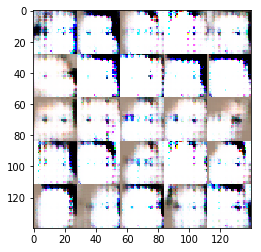

Epoch 1/1 - Batch 2400/6331:  Discriminator Loss: 0.4274... Generator Loss: 3.2980
Epoch 1/1 - Batch 2410/6331:  Discriminator Loss: 0.4216... Generator Loss: 4.2118
Epoch 1/1 - Batch 2420/6331:  Discriminator Loss: 0.5690... Generator Loss: 7.1371
Epoch 1/1 - Batch 2430/6331:  Discriminator Loss: 0.3823... Generator Loss: 4.2866
Epoch 1/1 - Batch 2440/6331:  Discriminator Loss: 0.5804... Generator Loss: 2.8946
Epoch 1/1 - Batch 2450/6331:  Discriminator Loss: 0.5260... Generator Loss: 3.3136
Epoch 1/1 - Batch 2460/6331:  Discriminator Loss: 0.4501... Generator Loss: 3.4448
Epoch 1/1 - Batch 2470/6331:  Discriminator Loss: 0.4979... Generator Loss: 5.4391
Epoch 1/1 - Batch 2480/6331:  Discriminator Loss: 0.4650... Generator Loss: 3.8728
Epoch 1/1 - Batch 2490/6331:  Discriminator Loss: 0.4666... Generator Loss: 3.3208


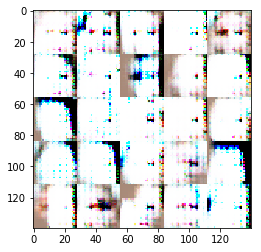

Epoch 1/1 - Batch 2500/6331:  Discriminator Loss: 0.4622... Generator Loss: 4.0481
Epoch 1/1 - Batch 2510/6331:  Discriminator Loss: 0.4083... Generator Loss: 3.6100
Epoch 1/1 - Batch 2520/6331:  Discriminator Loss: 0.4254... Generator Loss: 5.0758
Epoch 1/1 - Batch 2530/6331:  Discriminator Loss: 0.3941... Generator Loss: 5.9470
Epoch 1/1 - Batch 2540/6331:  Discriminator Loss: 0.4176... Generator Loss: 4.9461
Epoch 1/1 - Batch 2550/6331:  Discriminator Loss: 0.4209... Generator Loss: 4.3427
Epoch 1/1 - Batch 2560/6331:  Discriminator Loss: 0.4162... Generator Loss: 4.3468
Epoch 1/1 - Batch 2570/6331:  Discriminator Loss: 0.4824... Generator Loss: 3.6082
Epoch 1/1 - Batch 2580/6331:  Discriminator Loss: 0.4415... Generator Loss: 5.2420
Epoch 1/1 - Batch 2590/6331:  Discriminator Loss: 0.3975... Generator Loss: 3.8507


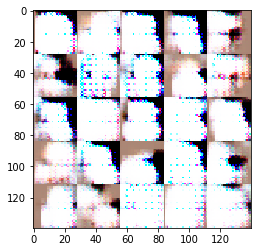

Epoch 1/1 - Batch 2600/6331:  Discriminator Loss: 0.4192... Generator Loss: 3.8740
Epoch 1/1 - Batch 2610/6331:  Discriminator Loss: 0.4493... Generator Loss: 2.8436
Epoch 1/1 - Batch 2620/6331:  Discriminator Loss: 0.7365... Generator Loss: 1.6201
Epoch 1/1 - Batch 2630/6331:  Discriminator Loss: 0.4731... Generator Loss: 3.7052
Epoch 1/1 - Batch 2640/6331:  Discriminator Loss: 0.4178... Generator Loss: 4.6816
Epoch 1/1 - Batch 2650/6331:  Discriminator Loss: 0.5089... Generator Loss: 2.3932
Epoch 1/1 - Batch 2660/6331:  Discriminator Loss: 0.3774... Generator Loss: 4.4723
Epoch 1/1 - Batch 2670/6331:  Discriminator Loss: 0.4791... Generator Loss: 3.1641
Epoch 1/1 - Batch 2680/6331:  Discriminator Loss: 0.4308... Generator Loss: 4.1671
Epoch 1/1 - Batch 2690/6331:  Discriminator Loss: 0.8951... Generator Loss: 1.3061


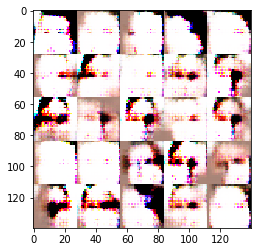

Epoch 1/1 - Batch 2700/6331:  Discriminator Loss: 0.5105... Generator Loss: 2.7736
Epoch 1/1 - Batch 2710/6331:  Discriminator Loss: 0.4786... Generator Loss: 4.0224
Epoch 1/1 - Batch 2720/6331:  Discriminator Loss: 0.6762... Generator Loss: 2.0751
Epoch 1/1 - Batch 2730/6331:  Discriminator Loss: 0.6380... Generator Loss: 4.3239
Epoch 1/1 - Batch 2740/6331:  Discriminator Loss: 0.4306... Generator Loss: 4.9873
Epoch 1/1 - Batch 2750/6331:  Discriminator Loss: 0.4324... Generator Loss: 4.4063
Epoch 1/1 - Batch 2760/6331:  Discriminator Loss: 0.4372... Generator Loss: 3.4487
Epoch 1/1 - Batch 2770/6331:  Discriminator Loss: 0.5471... Generator Loss: 2.6779
Epoch 1/1 - Batch 2780/6331:  Discriminator Loss: 0.4218... Generator Loss: 3.7626
Epoch 1/1 - Batch 2790/6331:  Discriminator Loss: 0.4484... Generator Loss: 3.3940


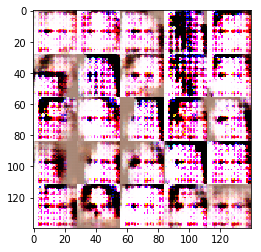

Epoch 1/1 - Batch 2800/6331:  Discriminator Loss: 0.4399... Generator Loss: 6.2002
Epoch 1/1 - Batch 2810/6331:  Discriminator Loss: 0.3854... Generator Loss: 6.3512
Epoch 1/1 - Batch 2820/6331:  Discriminator Loss: 0.4530... Generator Loss: 3.4678
Epoch 1/1 - Batch 2830/6331:  Discriminator Loss: 0.4308... Generator Loss: 5.7813
Epoch 1/1 - Batch 2840/6331:  Discriminator Loss: 0.5747... Generator Loss: 2.1230
Epoch 1/1 - Batch 2850/6331:  Discriminator Loss: 0.4494... Generator Loss: 4.4693
Epoch 1/1 - Batch 2860/6331:  Discriminator Loss: 0.4032... Generator Loss: 5.3982
Epoch 1/1 - Batch 2870/6331:  Discriminator Loss: 0.5891... Generator Loss: 2.9048
Epoch 1/1 - Batch 2880/6331:  Discriminator Loss: 0.6898... Generator Loss: 2.5654
Epoch 1/1 - Batch 2890/6331:  Discriminator Loss: 0.6364... Generator Loss: 3.0472


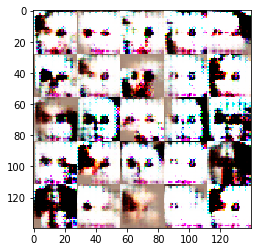

Epoch 1/1 - Batch 2900/6331:  Discriminator Loss: 0.5630... Generator Loss: 2.3866
Epoch 1/1 - Batch 2910/6331:  Discriminator Loss: 0.5049... Generator Loss: 2.4165
Epoch 1/1 - Batch 2920/6331:  Discriminator Loss: 0.5010... Generator Loss: 2.3890
Epoch 1/1 - Batch 2930/6331:  Discriminator Loss: 0.5445... Generator Loss: 2.6236
Epoch 1/1 - Batch 2940/6331:  Discriminator Loss: 0.5619... Generator Loss: 2.5599
Epoch 1/1 - Batch 2950/6331:  Discriminator Loss: 0.4145... Generator Loss: 4.1163
Epoch 1/1 - Batch 2960/6331:  Discriminator Loss: 0.4131... Generator Loss: 4.8910
Epoch 1/1 - Batch 2970/6331:  Discriminator Loss: 0.4005... Generator Loss: 3.6316
Epoch 1/1 - Batch 2980/6331:  Discriminator Loss: 1.2875... Generator Loss: 1.7214
Epoch 1/1 - Batch 2990/6331:  Discriminator Loss: 0.4227... Generator Loss: 7.1022


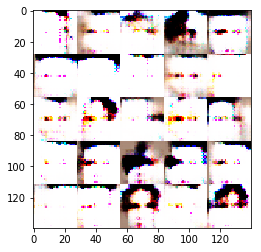

Epoch 1/1 - Batch 3000/6331:  Discriminator Loss: 0.4778... Generator Loss: 3.7071
Epoch 1/1 - Batch 3010/6331:  Discriminator Loss: 0.4359... Generator Loss: 3.8189
Epoch 1/1 - Batch 3020/6331:  Discriminator Loss: 0.4701... Generator Loss: 2.8591
Epoch 1/1 - Batch 3030/6331:  Discriminator Loss: 0.4537... Generator Loss: 5.2323
Epoch 1/1 - Batch 3040/6331:  Discriminator Loss: 0.5518... Generator Loss: 2.2770
Epoch 1/1 - Batch 3050/6331:  Discriminator Loss: 0.5199... Generator Loss: 2.8354
Epoch 1/1 - Batch 3060/6331:  Discriminator Loss: 0.4215... Generator Loss: 4.3766
Epoch 1/1 - Batch 3070/6331:  Discriminator Loss: 0.5885... Generator Loss: 2.5325
Epoch 1/1 - Batch 3080/6331:  Discriminator Loss: 0.4285... Generator Loss: 3.8405
Epoch 1/1 - Batch 3090/6331:  Discriminator Loss: 0.4061... Generator Loss: 3.7871


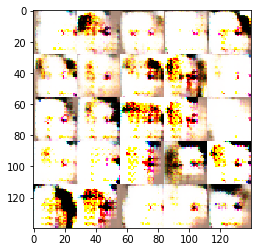

Epoch 1/1 - Batch 3100/6331:  Discriminator Loss: 0.4252... Generator Loss: 3.9275
Epoch 1/1 - Batch 3110/6331:  Discriminator Loss: 0.4819... Generator Loss: 2.6789
Epoch 1/1 - Batch 3120/6331:  Discriminator Loss: 0.5510... Generator Loss: 2.2582
Epoch 1/1 - Batch 3130/6331:  Discriminator Loss: 0.5000... Generator Loss: 4.9919
Epoch 1/1 - Batch 3140/6331:  Discriminator Loss: 0.6334... Generator Loss: 5.8800
Epoch 1/1 - Batch 3150/6331:  Discriminator Loss: 0.5811... Generator Loss: 6.8266
Epoch 1/1 - Batch 3160/6331:  Discriminator Loss: 0.4753... Generator Loss: 5.5508
Epoch 1/1 - Batch 3170/6331:  Discriminator Loss: 0.6352... Generator Loss: 1.8458
Epoch 1/1 - Batch 3180/6331:  Discriminator Loss: 0.4148... Generator Loss: 5.1906
Epoch 1/1 - Batch 3190/6331:  Discriminator Loss: 0.4092... Generator Loss: 4.5408


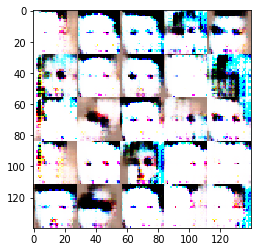

Epoch 1/1 - Batch 3200/6331:  Discriminator Loss: 0.4473... Generator Loss: 2.9694
Epoch 1/1 - Batch 3210/6331:  Discriminator Loss: 0.4440... Generator Loss: 4.0417
Epoch 1/1 - Batch 3220/6331:  Discriminator Loss: 0.4814... Generator Loss: 3.6015
Epoch 1/1 - Batch 3230/6331:  Discriminator Loss: 0.4606... Generator Loss: 5.4287
Epoch 1/1 - Batch 3240/6331:  Discriminator Loss: 0.4001... Generator Loss: 4.5932
Epoch 1/1 - Batch 3250/6331:  Discriminator Loss: 0.5573... Generator Loss: 2.3792
Epoch 1/1 - Batch 3260/6331:  Discriminator Loss: 0.6750... Generator Loss: 1.8803
Epoch 1/1 - Batch 3270/6331:  Discriminator Loss: 0.4691... Generator Loss: 3.3670
Epoch 1/1 - Batch 3280/6331:  Discriminator Loss: 0.4811... Generator Loss: 3.0408
Epoch 1/1 - Batch 3290/6331:  Discriminator Loss: 0.5300... Generator Loss: 2.3573


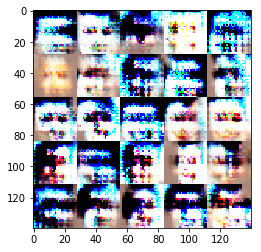

Epoch 1/1 - Batch 3300/6331:  Discriminator Loss: 0.5460... Generator Loss: 2.6769
Epoch 1/1 - Batch 3310/6331:  Discriminator Loss: 0.4419... Generator Loss: 4.0164
Epoch 1/1 - Batch 3320/6331:  Discriminator Loss: 0.4538... Generator Loss: 2.7917
Epoch 1/1 - Batch 3330/6331:  Discriminator Loss: 0.4281... Generator Loss: 3.4422
Epoch 1/1 - Batch 3340/6331:  Discriminator Loss: 0.4753... Generator Loss: 4.9741
Epoch 1/1 - Batch 3350/6331:  Discriminator Loss: 0.4502... Generator Loss: 4.9517
Epoch 1/1 - Batch 3360/6331:  Discriminator Loss: 0.4451... Generator Loss: 4.4397
Epoch 1/1 - Batch 3370/6331:  Discriminator Loss: 0.4539... Generator Loss: 3.0966
Epoch 1/1 - Batch 3380/6331:  Discriminator Loss: 0.5570... Generator Loss: 2.4359
Epoch 1/1 - Batch 3390/6331:  Discriminator Loss: 0.4509... Generator Loss: 5.2018


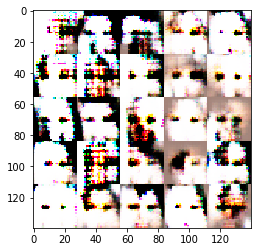

Epoch 1/1 - Batch 3400/6331:  Discriminator Loss: 0.4279... Generator Loss: 6.2632
Epoch 1/1 - Batch 3410/6331:  Discriminator Loss: 0.4032... Generator Loss: 6.2420
Epoch 1/1 - Batch 3420/6331:  Discriminator Loss: 0.4808... Generator Loss: 6.5270
Epoch 1/1 - Batch 3430/6331:  Discriminator Loss: 0.4541... Generator Loss: 4.0675
Epoch 1/1 - Batch 3440/6331:  Discriminator Loss: 0.4826... Generator Loss: 2.8865
Epoch 1/1 - Batch 3450/6331:  Discriminator Loss: 0.4960... Generator Loss: 2.7997
Epoch 1/1 - Batch 3460/6331:  Discriminator Loss: 0.4080... Generator Loss: 4.7337
Epoch 1/1 - Batch 3470/6331:  Discriminator Loss: 0.4607... Generator Loss: 4.6489
Epoch 1/1 - Batch 3480/6331:  Discriminator Loss: 0.3779... Generator Loss: 4.7816
Epoch 1/1 - Batch 3490/6331:  Discriminator Loss: 0.4019... Generator Loss: 4.2323


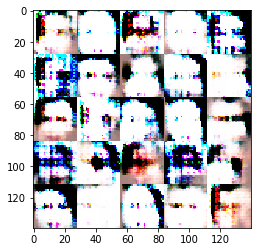

Epoch 1/1 - Batch 3500/6331:  Discriminator Loss: 0.4540... Generator Loss: 3.1500
Epoch 1/1 - Batch 3510/6331:  Discriminator Loss: 0.4270... Generator Loss: 4.1335
Epoch 1/1 - Batch 3520/6331:  Discriminator Loss: 0.4193... Generator Loss: 5.0530
Epoch 1/1 - Batch 3530/6331:  Discriminator Loss: 0.3944... Generator Loss: 4.3226
Epoch 1/1 - Batch 3540/6331:  Discriminator Loss: 0.4728... Generator Loss: 3.4818
Epoch 1/1 - Batch 3550/6331:  Discriminator Loss: 0.4235... Generator Loss: 3.1989
Epoch 1/1 - Batch 3560/6331:  Discriminator Loss: 0.4780... Generator Loss: 4.6838
Epoch 1/1 - Batch 3570/6331:  Discriminator Loss: 0.5120... Generator Loss: 2.3058
Epoch 1/1 - Batch 3580/6331:  Discriminator Loss: 0.3850... Generator Loss: 4.2740
Epoch 1/1 - Batch 3590/6331:  Discriminator Loss: 0.4341... Generator Loss: 3.4279


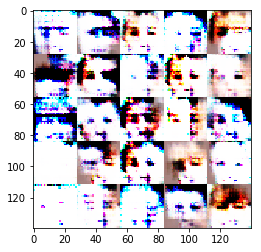

Epoch 1/1 - Batch 3600/6331:  Discriminator Loss: 0.5368... Generator Loss: 2.6139
Epoch 1/1 - Batch 3610/6331:  Discriminator Loss: 0.4291... Generator Loss: 3.5922
Epoch 1/1 - Batch 3620/6331:  Discriminator Loss: 0.4603... Generator Loss: 3.5103
Epoch 1/1 - Batch 3630/6331:  Discriminator Loss: 0.4429... Generator Loss: 4.0117
Epoch 1/1 - Batch 3640/6331:  Discriminator Loss: 0.4559... Generator Loss: 3.2230
Epoch 1/1 - Batch 3650/6331:  Discriminator Loss: 0.4728... Generator Loss: 2.8159
Epoch 1/1 - Batch 3660/6331:  Discriminator Loss: 0.4422... Generator Loss: 4.8417
Epoch 1/1 - Batch 3670/6331:  Discriminator Loss: 0.4024... Generator Loss: 5.1523
Epoch 1/1 - Batch 3680/6331:  Discriminator Loss: 0.6785... Generator Loss: 1.8464
Epoch 1/1 - Batch 3690/6331:  Discriminator Loss: 0.4051... Generator Loss: 3.6699


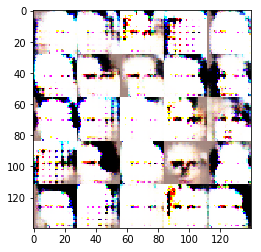

Epoch 1/1 - Batch 3700/6331:  Discriminator Loss: 0.4077... Generator Loss: 4.0954
Epoch 1/1 - Batch 3710/6331:  Discriminator Loss: 0.5264... Generator Loss: 2.8334
Epoch 1/1 - Batch 3720/6331:  Discriminator Loss: 0.6293... Generator Loss: 2.3817
Epoch 1/1 - Batch 3730/6331:  Discriminator Loss: 0.6646... Generator Loss: 5.8289
Epoch 1/1 - Batch 3740/6331:  Discriminator Loss: 0.4113... Generator Loss: 5.0874
Epoch 1/1 - Batch 3750/6331:  Discriminator Loss: 0.4379... Generator Loss: 3.8855
Epoch 1/1 - Batch 3760/6331:  Discriminator Loss: 0.5161... Generator Loss: 4.2031
Epoch 1/1 - Batch 3770/6331:  Discriminator Loss: 0.4704... Generator Loss: 4.5921
Epoch 1/1 - Batch 3780/6331:  Discriminator Loss: 0.4534... Generator Loss: 4.7518
Epoch 1/1 - Batch 3790/6331:  Discriminator Loss: 0.4116... Generator Loss: 4.6946


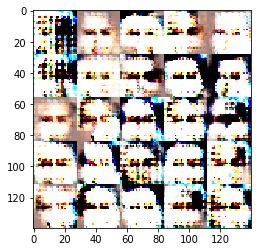

Epoch 1/1 - Batch 3800/6331:  Discriminator Loss: 0.5294... Generator Loss: 5.3657
Epoch 1/1 - Batch 3810/6331:  Discriminator Loss: 0.4485... Generator Loss: 3.9449
Epoch 1/1 - Batch 3820/6331:  Discriminator Loss: 0.4528... Generator Loss: 6.8929
Epoch 1/1 - Batch 3830/6331:  Discriminator Loss: 0.4704... Generator Loss: 3.0165
Epoch 1/1 - Batch 3840/6331:  Discriminator Loss: 0.4528... Generator Loss: 3.2646
Epoch 1/1 - Batch 3850/6331:  Discriminator Loss: 0.3980... Generator Loss: 3.8669
Epoch 1/1 - Batch 3860/6331:  Discriminator Loss: 0.5134... Generator Loss: 4.5839
Epoch 1/1 - Batch 3870/6331:  Discriminator Loss: 0.6458... Generator Loss: 2.4587
Epoch 1/1 - Batch 3880/6331:  Discriminator Loss: 0.4843... Generator Loss: 3.4756
Epoch 1/1 - Batch 3890/6331:  Discriminator Loss: 0.4599... Generator Loss: 4.8977


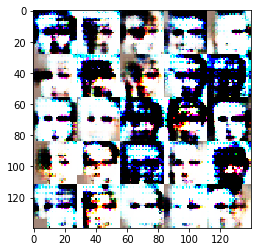

Epoch 1/1 - Batch 3900/6331:  Discriminator Loss: 0.4527... Generator Loss: 5.2085
Epoch 1/1 - Batch 3910/6331:  Discriminator Loss: 0.4269... Generator Loss: 3.4770
Epoch 1/1 - Batch 3920/6331:  Discriminator Loss: 0.4265... Generator Loss: 4.3349
Epoch 1/1 - Batch 3930/6331:  Discriminator Loss: 0.5046... Generator Loss: 3.2819
Epoch 1/1 - Batch 3940/6331:  Discriminator Loss: 0.4317... Generator Loss: 3.9821
Epoch 1/1 - Batch 3950/6331:  Discriminator Loss: 0.5044... Generator Loss: 3.7884
Epoch 1/1 - Batch 3960/6331:  Discriminator Loss: 0.4756... Generator Loss: 3.6664
Epoch 1/1 - Batch 3970/6331:  Discriminator Loss: 0.4386... Generator Loss: 3.9545
Epoch 1/1 - Batch 3980/6331:  Discriminator Loss: 0.4428... Generator Loss: 3.4647
Epoch 1/1 - Batch 3990/6331:  Discriminator Loss: 0.4486... Generator Loss: 3.4514


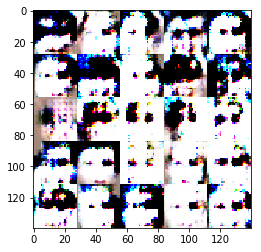

Epoch 1/1 - Batch 4000/6331:  Discriminator Loss: 0.5538... Generator Loss: 2.3676
Epoch 1/1 - Batch 4010/6331:  Discriminator Loss: 0.4477... Generator Loss: 3.7150
Epoch 1/1 - Batch 4020/6331:  Discriminator Loss: 0.5132... Generator Loss: 4.0643
Epoch 1/1 - Batch 4030/6331:  Discriminator Loss: 0.3788... Generator Loss: 5.2429
Epoch 1/1 - Batch 4040/6331:  Discriminator Loss: 0.4093... Generator Loss: 4.2318
Epoch 1/1 - Batch 4050/6331:  Discriminator Loss: 0.4387... Generator Loss: 3.1898
Epoch 1/1 - Batch 4060/6331:  Discriminator Loss: 0.3961... Generator Loss: 4.7160
Epoch 1/1 - Batch 4070/6331:  Discriminator Loss: 0.4970... Generator Loss: 2.5868
Epoch 1/1 - Batch 4080/6331:  Discriminator Loss: 0.4743... Generator Loss: 3.2505
Epoch 1/1 - Batch 4090/6331:  Discriminator Loss: 0.5044... Generator Loss: 4.9385


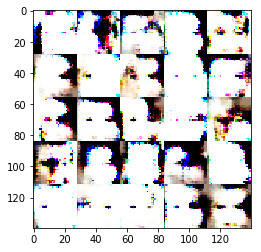

Epoch 1/1 - Batch 4100/6331:  Discriminator Loss: 0.4802... Generator Loss: 3.5426
Epoch 1/1 - Batch 4110/6331:  Discriminator Loss: 0.5336... Generator Loss: 3.2699
Epoch 1/1 - Batch 4120/6331:  Discriminator Loss: 0.4474... Generator Loss: 3.4298
Epoch 1/1 - Batch 4130/6331:  Discriminator Loss: 0.5199... Generator Loss: 2.4851
Epoch 1/1 - Batch 4140/6331:  Discriminator Loss: 0.3853... Generator Loss: 7.1500
Epoch 1/1 - Batch 4150/6331:  Discriminator Loss: 0.4707... Generator Loss: 4.2314
Epoch 1/1 - Batch 4160/6331:  Discriminator Loss: 0.4182... Generator Loss: 4.4270
Epoch 1/1 - Batch 4170/6331:  Discriminator Loss: 0.4582... Generator Loss: 4.2940
Epoch 1/1 - Batch 4180/6331:  Discriminator Loss: 0.4116... Generator Loss: 4.7634
Epoch 1/1 - Batch 4190/6331:  Discriminator Loss: 0.3914... Generator Loss: 7.2978


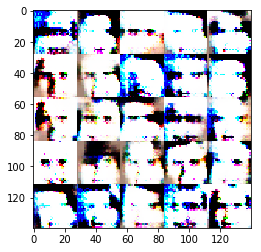

Epoch 1/1 - Batch 4200/6331:  Discriminator Loss: 0.4430... Generator Loss: 4.1351
Epoch 1/1 - Batch 4210/6331:  Discriminator Loss: 0.4633... Generator Loss: 3.0954
Epoch 1/1 - Batch 4220/6331:  Discriminator Loss: 0.4355... Generator Loss: 3.3279
Epoch 1/1 - Batch 4230/6331:  Discriminator Loss: 0.4611... Generator Loss: 3.0612
Epoch 1/1 - Batch 4240/6331:  Discriminator Loss: 0.4452... Generator Loss: 4.1120
Epoch 1/1 - Batch 4250/6331:  Discriminator Loss: 0.4139... Generator Loss: 4.1506
Epoch 1/1 - Batch 4260/6331:  Discriminator Loss: 0.4238... Generator Loss: 3.9147
Epoch 1/1 - Batch 4270/6331:  Discriminator Loss: 0.4754... Generator Loss: 2.9221
Epoch 1/1 - Batch 4280/6331:  Discriminator Loss: 0.4737... Generator Loss: 2.8234
Epoch 1/1 - Batch 4290/6331:  Discriminator Loss: 0.5264... Generator Loss: 4.5523


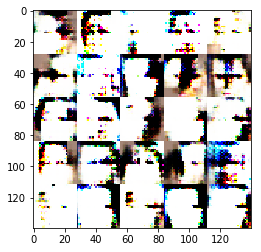

Epoch 1/1 - Batch 4300/6331:  Discriminator Loss: 0.4825... Generator Loss: 2.6973
Epoch 1/1 - Batch 4310/6331:  Discriminator Loss: 0.4865... Generator Loss: 2.7234
Epoch 1/1 - Batch 4320/6331:  Discriminator Loss: 0.4694... Generator Loss: 3.1208
Epoch 1/1 - Batch 4330/6331:  Discriminator Loss: 0.4519... Generator Loss: 4.6897
Epoch 1/1 - Batch 4340/6331:  Discriminator Loss: 0.4297... Generator Loss: 4.5417
Epoch 1/1 - Batch 4350/6331:  Discriminator Loss: 0.4335... Generator Loss: 5.2141
Epoch 1/1 - Batch 4360/6331:  Discriminator Loss: 0.4190... Generator Loss: 5.1858
Epoch 1/1 - Batch 4370/6331:  Discriminator Loss: 0.4124... Generator Loss: 3.9338
Epoch 1/1 - Batch 4380/6331:  Discriminator Loss: 0.4480... Generator Loss: 5.0699
Epoch 1/1 - Batch 4390/6331:  Discriminator Loss: 0.4303... Generator Loss: 4.4241


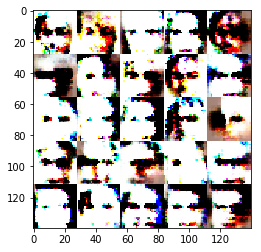

Epoch 1/1 - Batch 4400/6331:  Discriminator Loss: 0.4736... Generator Loss: 3.2461
Epoch 1/1 - Batch 4410/6331:  Discriminator Loss: 0.4360... Generator Loss: 4.9327
Epoch 1/1 - Batch 4420/6331:  Discriminator Loss: 0.4566... Generator Loss: 4.1550
Epoch 1/1 - Batch 4430/6331:  Discriminator Loss: 0.4669... Generator Loss: 2.8744
Epoch 1/1 - Batch 4440/6331:  Discriminator Loss: 0.3816... Generator Loss: 4.5263
Epoch 1/1 - Batch 4450/6331:  Discriminator Loss: 0.4126... Generator Loss: 4.7174
Epoch 1/1 - Batch 4460/6331:  Discriminator Loss: 0.4193... Generator Loss: 3.4745
Epoch 1/1 - Batch 4470/6331:  Discriminator Loss: 0.4135... Generator Loss: 3.8141
Epoch 1/1 - Batch 4480/6331:  Discriminator Loss: 0.4216... Generator Loss: 4.5078
Epoch 1/1 - Batch 4490/6331:  Discriminator Loss: 0.4341... Generator Loss: 3.5251


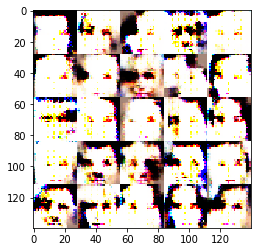

Epoch 1/1 - Batch 4500/6331:  Discriminator Loss: 0.4070... Generator Loss: 3.9895
Epoch 1/1 - Batch 4510/6331:  Discriminator Loss: 0.4193... Generator Loss: 3.0903
Epoch 1/1 - Batch 4520/6331:  Discriminator Loss: 0.3976... Generator Loss: 4.1304
Epoch 1/1 - Batch 4530/6331:  Discriminator Loss: 0.3965... Generator Loss: 3.7133
Epoch 1/1 - Batch 4540/6331:  Discriminator Loss: 0.4089... Generator Loss: 4.6228
Epoch 1/1 - Batch 4550/6331:  Discriminator Loss: 0.4362... Generator Loss: 6.4519
Epoch 1/1 - Batch 4560/6331:  Discriminator Loss: 0.7488... Generator Loss: 1.8802
Epoch 1/1 - Batch 4570/6331:  Discriminator Loss: 0.4336... Generator Loss: 3.1880
Epoch 1/1 - Batch 4580/6331:  Discriminator Loss: 0.4292... Generator Loss: 5.3565
Epoch 1/1 - Batch 4590/6331:  Discriminator Loss: 0.3862... Generator Loss: 3.7845


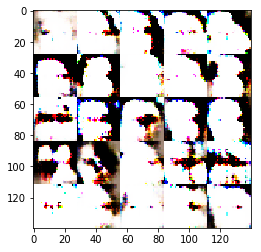

Epoch 1/1 - Batch 4600/6331:  Discriminator Loss: 0.4107... Generator Loss: 4.5094
Epoch 1/1 - Batch 4610/6331:  Discriminator Loss: 0.5125... Generator Loss: 2.9518
Epoch 1/1 - Batch 4620/6331:  Discriminator Loss: 0.4338... Generator Loss: 4.1235
Epoch 1/1 - Batch 4630/6331:  Discriminator Loss: 0.4829... Generator Loss: 2.7526
Epoch 1/1 - Batch 4640/6331:  Discriminator Loss: 0.4193... Generator Loss: 6.1110
Epoch 1/1 - Batch 4650/6331:  Discriminator Loss: 0.4071... Generator Loss: 5.7071
Epoch 1/1 - Batch 4660/6331:  Discriminator Loss: 0.4824... Generator Loss: 3.6967
Epoch 1/1 - Batch 4670/6331:  Discriminator Loss: 0.4143... Generator Loss: 4.9863
Epoch 1/1 - Batch 4680/6331:  Discriminator Loss: 0.5059... Generator Loss: 5.5274
Epoch 1/1 - Batch 4690/6331:  Discriminator Loss: 0.4006... Generator Loss: 4.7613


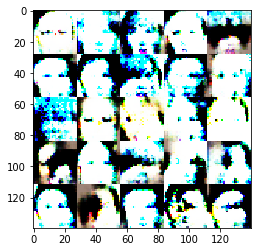

Epoch 1/1 - Batch 4700/6331:  Discriminator Loss: 0.5116... Generator Loss: 3.6048
Epoch 1/1 - Batch 4710/6331:  Discriminator Loss: 0.3982... Generator Loss: 4.5701
Epoch 1/1 - Batch 4720/6331:  Discriminator Loss: 0.4135... Generator Loss: 3.7007
Epoch 1/1 - Batch 4730/6331:  Discriminator Loss: 0.3924... Generator Loss: 4.4675
Epoch 1/1 - Batch 4740/6331:  Discriminator Loss: 0.4680... Generator Loss: 3.2891
Epoch 1/1 - Batch 4750/6331:  Discriminator Loss: 0.4282... Generator Loss: 3.0941
Epoch 1/1 - Batch 4760/6331:  Discriminator Loss: 0.4136... Generator Loss: 5.9454
Epoch 1/1 - Batch 4770/6331:  Discriminator Loss: 0.4384... Generator Loss: 4.3722
Epoch 1/1 - Batch 4780/6331:  Discriminator Loss: 0.4014... Generator Loss: 5.2165
Epoch 1/1 - Batch 4790/6331:  Discriminator Loss: 0.4381... Generator Loss: 3.1157


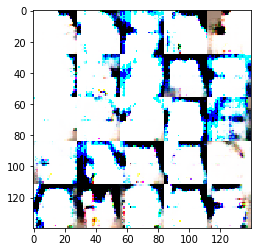

Epoch 1/1 - Batch 4800/6331:  Discriminator Loss: 0.4511... Generator Loss: 3.6407
Epoch 1/1 - Batch 4810/6331:  Discriminator Loss: 0.5267... Generator Loss: 2.7846
Epoch 1/1 - Batch 4820/6331:  Discriminator Loss: 0.4242... Generator Loss: 3.6142
Epoch 1/1 - Batch 4830/6331:  Discriminator Loss: 0.4088... Generator Loss: 4.3521
Epoch 1/1 - Batch 4840/6331:  Discriminator Loss: 0.5077... Generator Loss: 4.7448
Epoch 1/1 - Batch 4850/6331:  Discriminator Loss: 0.4511... Generator Loss: 4.2869
Epoch 1/1 - Batch 4860/6331:  Discriminator Loss: 0.4383... Generator Loss: 3.7038
Epoch 1/1 - Batch 4870/6331:  Discriminator Loss: 0.4751... Generator Loss: 4.3852
Epoch 1/1 - Batch 4880/6331:  Discriminator Loss: 0.4922... Generator Loss: 5.0479
Epoch 1/1 - Batch 4890/6331:  Discriminator Loss: 0.4462... Generator Loss: 3.3375


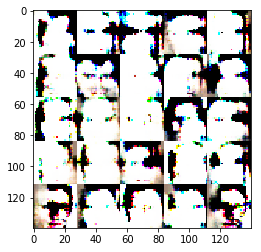

Epoch 1/1 - Batch 4900/6331:  Discriminator Loss: 0.4091... Generator Loss: 3.5151
Epoch 1/1 - Batch 4910/6331:  Discriminator Loss: 0.4036... Generator Loss: 3.6608
Epoch 1/1 - Batch 4920/6331:  Discriminator Loss: 0.4055... Generator Loss: 3.8574
Epoch 1/1 - Batch 4930/6331:  Discriminator Loss: 0.5061... Generator Loss: 6.4411
Epoch 1/1 - Batch 4940/6331:  Discriminator Loss: 0.3982... Generator Loss: 3.7874
Epoch 1/1 - Batch 4950/6331:  Discriminator Loss: 0.4371... Generator Loss: 3.2376
Epoch 1/1 - Batch 4960/6331:  Discriminator Loss: 0.4088... Generator Loss: 3.9558
Epoch 1/1 - Batch 4970/6331:  Discriminator Loss: 0.4407... Generator Loss: 3.6839
Epoch 1/1 - Batch 4980/6331:  Discriminator Loss: 0.4389... Generator Loss: 3.5443
Epoch 1/1 - Batch 4990/6331:  Discriminator Loss: 0.4961... Generator Loss: 2.8398


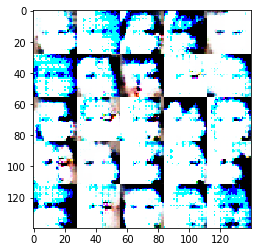

Epoch 1/1 - Batch 5000/6331:  Discriminator Loss: 0.5004... Generator Loss: 2.7143
Epoch 1/1 - Batch 5010/6331:  Discriminator Loss: 0.4689... Generator Loss: 3.6333
Epoch 1/1 - Batch 5020/6331:  Discriminator Loss: 0.5081... Generator Loss: 2.3731
Epoch 1/1 - Batch 5030/6331:  Discriminator Loss: 0.6041... Generator Loss: 6.0948
Epoch 1/1 - Batch 5040/6331:  Discriminator Loss: 0.4882... Generator Loss: 5.3405
Epoch 1/1 - Batch 5050/6331:  Discriminator Loss: 0.4487... Generator Loss: 3.1843
Epoch 1/1 - Batch 5060/6331:  Discriminator Loss: 0.4119... Generator Loss: 4.0436
Epoch 1/1 - Batch 5070/6331:  Discriminator Loss: 0.4100... Generator Loss: 4.1773
Epoch 1/1 - Batch 5080/6331:  Discriminator Loss: 0.3785... Generator Loss: 4.5407
Epoch 1/1 - Batch 5090/6331:  Discriminator Loss: 0.4098... Generator Loss: 4.1119


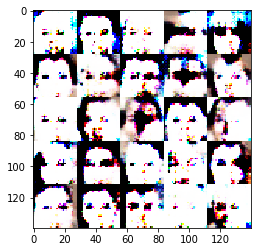

Epoch 1/1 - Batch 5100/6331:  Discriminator Loss: 0.4351... Generator Loss: 3.6114
Epoch 1/1 - Batch 5110/6331:  Discriminator Loss: 0.4784... Generator Loss: 4.1945
Epoch 1/1 - Batch 5120/6331:  Discriminator Loss: 0.4006... Generator Loss: 4.8833
Epoch 1/1 - Batch 5130/6331:  Discriminator Loss: 0.4210... Generator Loss: 3.6378
Epoch 1/1 - Batch 5140/6331:  Discriminator Loss: 0.3918... Generator Loss: 4.0174
Epoch 1/1 - Batch 5150/6331:  Discriminator Loss: 0.4460... Generator Loss: 3.9476
Epoch 1/1 - Batch 5160/6331:  Discriminator Loss: 0.3748... Generator Loss: 4.4723
Epoch 1/1 - Batch 5170/6331:  Discriminator Loss: 0.3977... Generator Loss: 3.4686
Epoch 1/1 - Batch 5180/6331:  Discriminator Loss: 0.4065... Generator Loss: 3.2878
Epoch 1/1 - Batch 5190/6331:  Discriminator Loss: 0.3880... Generator Loss: 4.0518


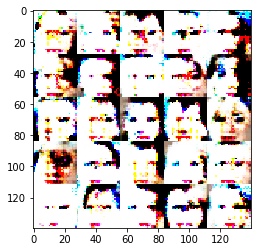

Epoch 1/1 - Batch 5200/6331:  Discriminator Loss: 0.4506... Generator Loss: 4.3618
Epoch 1/1 - Batch 5210/6331:  Discriminator Loss: 0.3992... Generator Loss: 4.2985
Epoch 1/1 - Batch 5220/6331:  Discriminator Loss: 0.3818... Generator Loss: 4.7327
Epoch 1/1 - Batch 5230/6331:  Discriminator Loss: 0.4124... Generator Loss: 4.1107
Epoch 1/1 - Batch 5240/6331:  Discriminator Loss: 0.3918... Generator Loss: 4.3679
Epoch 1/1 - Batch 5250/6331:  Discriminator Loss: 0.4278... Generator Loss: 5.3567
Epoch 1/1 - Batch 5260/6331:  Discriminator Loss: 0.3915... Generator Loss: 4.3105
Epoch 1/1 - Batch 5270/6331:  Discriminator Loss: 0.3811... Generator Loss: 4.1169
Epoch 1/1 - Batch 5280/6331:  Discriminator Loss: 0.5259... Generator Loss: 2.3640
Epoch 1/1 - Batch 5290/6331:  Discriminator Loss: 0.3975... Generator Loss: 5.3967


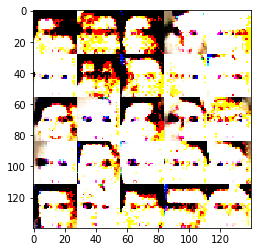

Epoch 1/1 - Batch 5300/6331:  Discriminator Loss: 0.4699... Generator Loss: 7.6818
Epoch 1/1 - Batch 5310/6331:  Discriminator Loss: 0.4243... Generator Loss: 8.1424
Epoch 1/1 - Batch 5320/6331:  Discriminator Loss: 0.5653... Generator Loss: 4.7920
Epoch 1/1 - Batch 5330/6331:  Discriminator Loss: 0.4108... Generator Loss: 4.1759
Epoch 1/1 - Batch 5340/6331:  Discriminator Loss: 0.3940... Generator Loss: 4.3044
Epoch 1/1 - Batch 5350/6331:  Discriminator Loss: 0.3735... Generator Loss: 4.3370
Epoch 1/1 - Batch 5360/6331:  Discriminator Loss: 0.3901... Generator Loss: 4.5429
Epoch 1/1 - Batch 5370/6331:  Discriminator Loss: 0.4143... Generator Loss: 3.2766
Epoch 1/1 - Batch 5380/6331:  Discriminator Loss: 0.5498... Generator Loss: 2.6206
Epoch 1/1 - Batch 5390/6331:  Discriminator Loss: 0.4297... Generator Loss: 3.3987


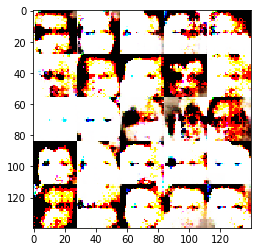

Epoch 1/1 - Batch 5400/6331:  Discriminator Loss: 0.3969... Generator Loss: 3.8465
Epoch 1/1 - Batch 5410/6331:  Discriminator Loss: 0.4131... Generator Loss: 3.3356
Epoch 1/1 - Batch 5420/6331:  Discriminator Loss: 0.4175... Generator Loss: 6.5982
Epoch 1/1 - Batch 5430/6331:  Discriminator Loss: 0.3849... Generator Loss: 5.9834
Epoch 1/1 - Batch 5440/6331:  Discriminator Loss: 0.3617... Generator Loss: 5.6345
Epoch 1/1 - Batch 5450/6331:  Discriminator Loss: 0.4097... Generator Loss: 4.7449
Epoch 1/1 - Batch 5460/6331:  Discriminator Loss: 0.4525... Generator Loss: 3.1312
Epoch 1/1 - Batch 5470/6331:  Discriminator Loss: 0.3885... Generator Loss: 3.7197
Epoch 1/1 - Batch 5480/6331:  Discriminator Loss: 0.4079... Generator Loss: 3.4242
Epoch 1/1 - Batch 5490/6331:  Discriminator Loss: 0.4588... Generator Loss: 2.8636


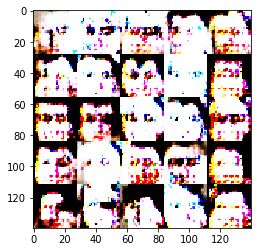

Epoch 1/1 - Batch 5500/6331:  Discriminator Loss: 0.4000... Generator Loss: 4.3927
Epoch 1/1 - Batch 5510/6331:  Discriminator Loss: 0.4166... Generator Loss: 4.1134
Epoch 1/1 - Batch 5520/6331:  Discriminator Loss: 0.4011... Generator Loss: 4.8683
Epoch 1/1 - Batch 5530/6331:  Discriminator Loss: 0.4414... Generator Loss: 3.4853
Epoch 1/1 - Batch 5540/6331:  Discriminator Loss: 0.3759... Generator Loss: 5.1700
Epoch 1/1 - Batch 5550/6331:  Discriminator Loss: 0.4093... Generator Loss: 3.9095
Epoch 1/1 - Batch 5560/6331:  Discriminator Loss: 0.5426... Generator Loss: 2.2968
Epoch 1/1 - Batch 5570/6331:  Discriminator Loss: 0.4040... Generator Loss: 4.5377
Epoch 1/1 - Batch 5580/6331:  Discriminator Loss: 0.3907... Generator Loss: 5.7036
Epoch 1/1 - Batch 5590/6331:  Discriminator Loss: 0.4180... Generator Loss: 3.3513


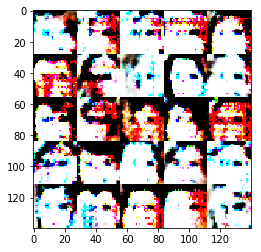

Epoch 1/1 - Batch 5600/6331:  Discriminator Loss: 0.3528... Generator Loss: 6.6646
Epoch 1/1 - Batch 5610/6331:  Discriminator Loss: 0.3856... Generator Loss: 5.6470
Epoch 1/1 - Batch 5620/6331:  Discriminator Loss: 0.4549... Generator Loss: 4.8500


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.9


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.